In [1]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot, patches
pyplot.style.use("ggplot")

## Quick summary of all FDR estimate information

In [2]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

output_dir = "/Poppy/mfedarko/chicken-gut-meta/sf/fdr-estimate-dmac100x-p/"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir(output_dir):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print("All decoy contexts we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All decoy contexts we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
s0.ctg000001l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1.ctg000002c,46.448435,46.197171,45.347015,45.089362,43.895446,43.699017,42.550349,41.426888,41.399109,41.016223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
s10.ctg000011c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s100.ctg000114l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1000.ctg001185l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
2.932331e+02

293.2331

In [88]:
di.loc["s92.ctg000105c"].head()

AverageCoverage                   2.932331e+02
Length                            1.896378e+06
DivIdx(p=50,minSuffCov=1000.0)             NaN
DivIdx(p=100,minSuffCov=500.0)             NaN
DivIdx(p=200,minSuffCov=250.0)    7.816456e-06
Name: s92.ctg000105c, dtype: float64

## Select some target contigs

Diversity indices aren't super useful here, since I didn't decrease _minReadNumber_ -- this means that very few contigs are "sufficiently covered" for small values of _p_. Relying on the diversity indices for larger values of _p_ like 5% is possible, but there isn't necessarily correlation between many common mutations and many rarer mutations. So, for the sake of quickly getting this ready (it's 4am), we do something analogous to lowering _minReadNumber_ -- we just select 8 target contigs with good lengths and coverages, sorting by number of mutations per Mb at $p = 1\%$ (without imposing the minimum sufficient coverage check that the diversity index computation does).

In [94]:
di = pd.read_csv("/Poppy/mfedarko/chicken-gut-meta/sf/call-p-minp100/diversity-indices.tsv", sep="\t", index_col=0)

In [96]:
long_di = di[di["Length"] >= 1000000]
good_hicov_di = long_di[long_di["AverageCoverage"] >= 100]
good_numpermbs = numpermbs[numpermbs.index.isin(good_hicov_di.index)]
good_high100 = good_numpermbs.sort_values(["p100"], ascending=False)
good_high100.head(8)

,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
s7.ctg000008c,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,6725.460953,...,8.993746,8.683616,4.651937,4.651937,4.651937,4.651937,0.000000,0.000000,0.000000,0
s237.ctg000283c,5090.063978,5056.592305,5018.973699,4982.836141,4949.660677,4907.006510,4855.169848,4807.183910,4776.970541,4731.058069,...,1.777257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
s224.ctg000264c,3198.280396,3189.989684,3178.659044,3167.604761,3151.299693,3135.547340,3115.096917,3084.421282,3066.181715,3021.411870,...,0.276357,0.276357,0.276357,0.276357,0.276357,0.000000,0.000000,0.000000,0.000000,0
s71.ctg000079c,894.905229,882.081042,868.699282,852.529655,834.129734,817.123747,802.069266,782.275412,771.960305,751.608878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
s123.ctg000145c,857.265962,857.265962,857.265962,857.265962,857.265962,856.769572,856.273181,854.287620,854.287620,851.309279,...,0.496390,0.496390,0.496390,0.496390,0.496390,0.496390,0.000000,0.000000,0.000000,0
s14.ctg000015c,721.684768,704.027722,684.492268,666.835223,645.421359,620.250677,591.698859,562.771360,549.622496,521.070678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
s1.ctg000002c,610.235317,598.589604,586.943892,574.965446,566.979814,557.663245,548.346675,542.357451,534.371820,526.718924,...,4.658285,3.992816,3.992816,3.992816,3.992816,3.327346,1.330939,1.330939,0.665469,0
s84.ctg000094c,579.781371,579.781371,578.945550,578.666943,577.552515,576.438086,575.323658,571.144551,569.194302,565.293802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [101]:
good_hicov_di

,AverageCoverage,Length,"DivIdx(p=50,minSuffCov=1000.0)","DivIdx(p=100,minSuffCov=500.0)","DivIdx(p=200,minSuffCov=250.0)","DivIdx(p=500,minSuffCov=100.0)","DivIdx(p=1000,minSuffCov=50.0)","DivIdx(p=2500,minSuffCov=20.0)","DivIdx(p=5000,minSuffCov=10.0)"
Contig,,,,,,,,,
s1.ctg000002c,304.735459,3005398,NaN,NaN,0.000196,3.849828e-05,2.196518e-05,2.196049e-05,0.000002
s7.ctg000008c,109.301852,3224463,NaN,NaN,NaN,1.254113e-04,1.186292e-05,0.000000e+00,0.000000
s11.ctg000012l,210.620674,1947245,NaN,NaN,NaN,9.056106e-05,5.993612e-05,3.657946e-05,0.000001
s14.ctg000015c,172.720518,2661827,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
s31.ctg000033c,196.807934,2072644,NaN,NaN,NaN,6.272185e-06,4.824755e-06,0.000000e+00,0.000000
s58.ctg000063c,105.286754,4286324,NaN,NaN,NaN,2.614824e-06,4.209248e-06,2.146364e-05,0.000000
s61.ctg000066c,226.603520,4860662,NaN,NaN,NaN,2.139929e-07,0.000000e+00,0.000000e+00,0.000000
s71.ctg000079c,150.283138,3586972,NaN,NaN,NaN,4.161650e-05,3.831232e-05,2.489515e-05,0.000000
s84.ctg000094c,129.114613,3589284,NaN,NaN,NaN,6.537623e-07,0.000000e+00,0.000000e+00,0.000000


## Plot FDR curves

In [117]:
# settings stolen from myself at
# https://github.com/fedarko/sheepgut/blob/main/sf-analyses/sheep/3-PlotFDRCurves.ipynb
#
# (I know, I know, I should abstract this to another code file or something)

# rainbow colorscheme - inspired by Elias/Gygi '07, Fig. 2a & 2b (and also homestuck lol)
#
# Note that we have 10 colors, not 11, since we will not be plotting the "CP2Nonsyn" context (see
# below for details)
rainbow = [
    "#713F16", "#D40000", "#D47400", "#D4CE00", "#2F8C04",
    "#00BBC3", "#0079CC", "#0022CC", "#790096", "#CC007C"
]

# go o+solid, o+dashed, o+dotted, o+dashdot, D+solid, ...
# this way of varying linestyles and markers means that even if the reader cannot perceive
# differences in color they should still be able to unambiguously figure out which line is which
# see https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyles = ["solid", (0,(5,1)), (0, (1,1)), "dashdot"] * 3
markers = (["o"] * 4) + (["D"] * 4) + (["*"] * 2)

# Draw a line indicating "wow we can fix the estimated FDR here"
fdr_fix_pct = 1
fdr_fix_color = "#333"

# What contigs are we going to plot?
small_plot_contigs = list(good_high100.index[:8])

BIG_CONTIG = "s7.ctg000008c"
assert BIG_CONTIG in small_plot_contigs

DECOY_CONTIG = "s92.ctg000105c"
assert DECOY_CONTIG not in small_plot_contigs

# What contexts are we going to plot, and what colors do we want to use?
# Let's order them up here, so that we can consistently map them to a color + style.
# Match orderings in the other SheepGut FDR curves...
ctxs = ["CP2", "Nonsyn", "Full", "CP2Tv", "TvNonsyn", "Tv", "Nonsense", "TvNonsense", "CP2Nonsense", "CP2TvNonsense"]

# Keep it simple for the small plots, which don't have a ton of space
ctx_to_plot_small = ["Full", "CP2", "Tv", "Nonsense"]

# Map context names to colors, linestyles, and markers
ctx2color = {}
ctx2linesty = {}
ctx2marker = {}
for ci, ctx in enumerate(ctxs):
    ctx2color[ctx] = rainbow[ci]
    ctx2linesty[ctx] = linestyles[ci]
    ctx2marker[ctx] = markers[ci]

# Also map context names to easier-to-read ones
ctx2name = {
    "CP2": "CP2",
    "CP2Nonsense": "CP2 & Nonsense",
    "CP2Nonsyn": "CP2 & Nonsyn",
    "CP2Tv": "CP2 & Tv",
    "CP2TvNonsense": "CP2 & Tv & Nonsense",
    "Full": "Full [no context]",
    "Nonsense": "Nonsense",
    "Nonsyn": "Nonsyn",
    "Tv": "Tv",
    "TvNonsense": "Tv & Nonsense",
    "TvNonsyn": "Tv & Nonsyn",
}
    
pvals = [int(pstr[1:]) for pstr in numpermbs.columns]
min_p = min(pvals)
max_p = max(pvals)

special_p_kwargs = {"color": "#333", "fontweight": "semibold"}

In [24]:
def plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot, ax, lw=3, markersize=5, xlim_min=-0.3):
    thresh_vals = [int(tstr[1:]) for tstr in numpermbs.columns]
    tt = numpermbs.columns[0][0]
    assert tt in ["p", "r"]
    xlim_max = 100
    for ctx in ctx_to_plot:
        x = []
        y = []
        best_thresh = None
        
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        
        for f, n, thresh in zip(xvals, yvals, thresh_vals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)
                
                errtext = f"for ctx {ctx} for contig {contig}"
                # this case can be handled, of course, but it's nice to know when things get high
                # *don't* need to clamp
                if f >= xlim_max:
                    print(f"FYI we found an est FDR = {f}% >= {xlim_max}% {errtext}")
                    xlim_max = f * 1.2
                    
                # should never happen
                if f < 0:
                    raise ValueError(f"Found an est FDR = {f}% < 0% {errtext} (what????)")
                    
                if f <= fdr_fix_pct:
                    # we're iterating through these in ascending order, so i guess we could
                    # just break once we see a "passing" value of r. but let's idiotproof this
                    # in case i change the order later lol
                    if best_thresh is None or thresh < best_thresh:
                        best_thresh = thresh
            else:
                print(f"contig {contig}: fyi, FDR is nan for {tt} = {thresh}")

        if best_thresh is not None:
            if tt == "p":
                ts = f"($p$ = {best_thresh / 100:.2f}%)"
            else:
                ts = f"($r$ = {best_thresh:,})"
            label = f"{ctx2name[ctx]} {ts}"
            
        else:
            label = f"{ctx2name[ctx]} (no rare mutations selectable)"
                        
        # plot the curve itself
        ax.plot(
            x,
            y,
            color=ctx2color[ctx],
            linestyle=ctx2linesty[ctx],
            marker=ctx2marker[ctx],
            lw=lw,
            label=label,
            markersize=markersize
        )
        
    ax.axvline(x=fdr_fix_pct, linestyle="--", color=fdr_fix_color, lw=lw)
    
    ax.set_xscale("symlog")
    ax.xaxis.set_major_formatter("{x:,.0f}")
    ax.yaxis.set_major_formatter("{x:,.0f}")
    ax.set_xlim(xlim_min, xlim_max)
    
    ax.tick_params(axis="y", which="major", labelsize=13)
    ax.tick_params(axis="x", which="major", labelsize=13)
    ax.tick_params(axis="x", which="minor", labelsize=12)

contig s7.ctg000008c: fyi, FDR is nan for p = 496
contig s7.ctg000008c: fyi, FDR is nan for p = 497
contig s7.ctg000008c: fyi, FDR is nan for p = 498
contig s7.ctg000008c: fyi, FDR is nan for p = 499
contig s7.ctg000008c: fyi, FDR is nan for p = 496
contig s7.ctg000008c: fyi, FDR is nan for p = 497
contig s7.ctg000008c: fyi, FDR is nan for p = 498
contig s7.ctg000008c: fyi, FDR is nan for p = 499
contig s7.ctg000008c: fyi, FDR is nan for p = 496
contig s7.ctg000008c: fyi, FDR is nan for p = 497
contig s7.ctg000008c: fyi, FDR is nan for p = 498
contig s7.ctg000008c: fyi, FDR is nan for p = 499
contig s7.ctg000008c: fyi, FDR is nan for p = 496
contig s7.ctg000008c: fyi, FDR is nan for p = 497
contig s7.ctg000008c: fyi, FDR is nan for p = 498
contig s7.ctg000008c: fyi, FDR is nan for p = 499
contig s237.ctg000283c: fyi, FDR is nan for p = 491
contig s237.ctg000283c: fyi, FDR is nan for p = 492
contig s237.ctg000283c: fyi, FDR is nan for p = 493
contig s237.ctg000283c: fyi, FDR is nan for 

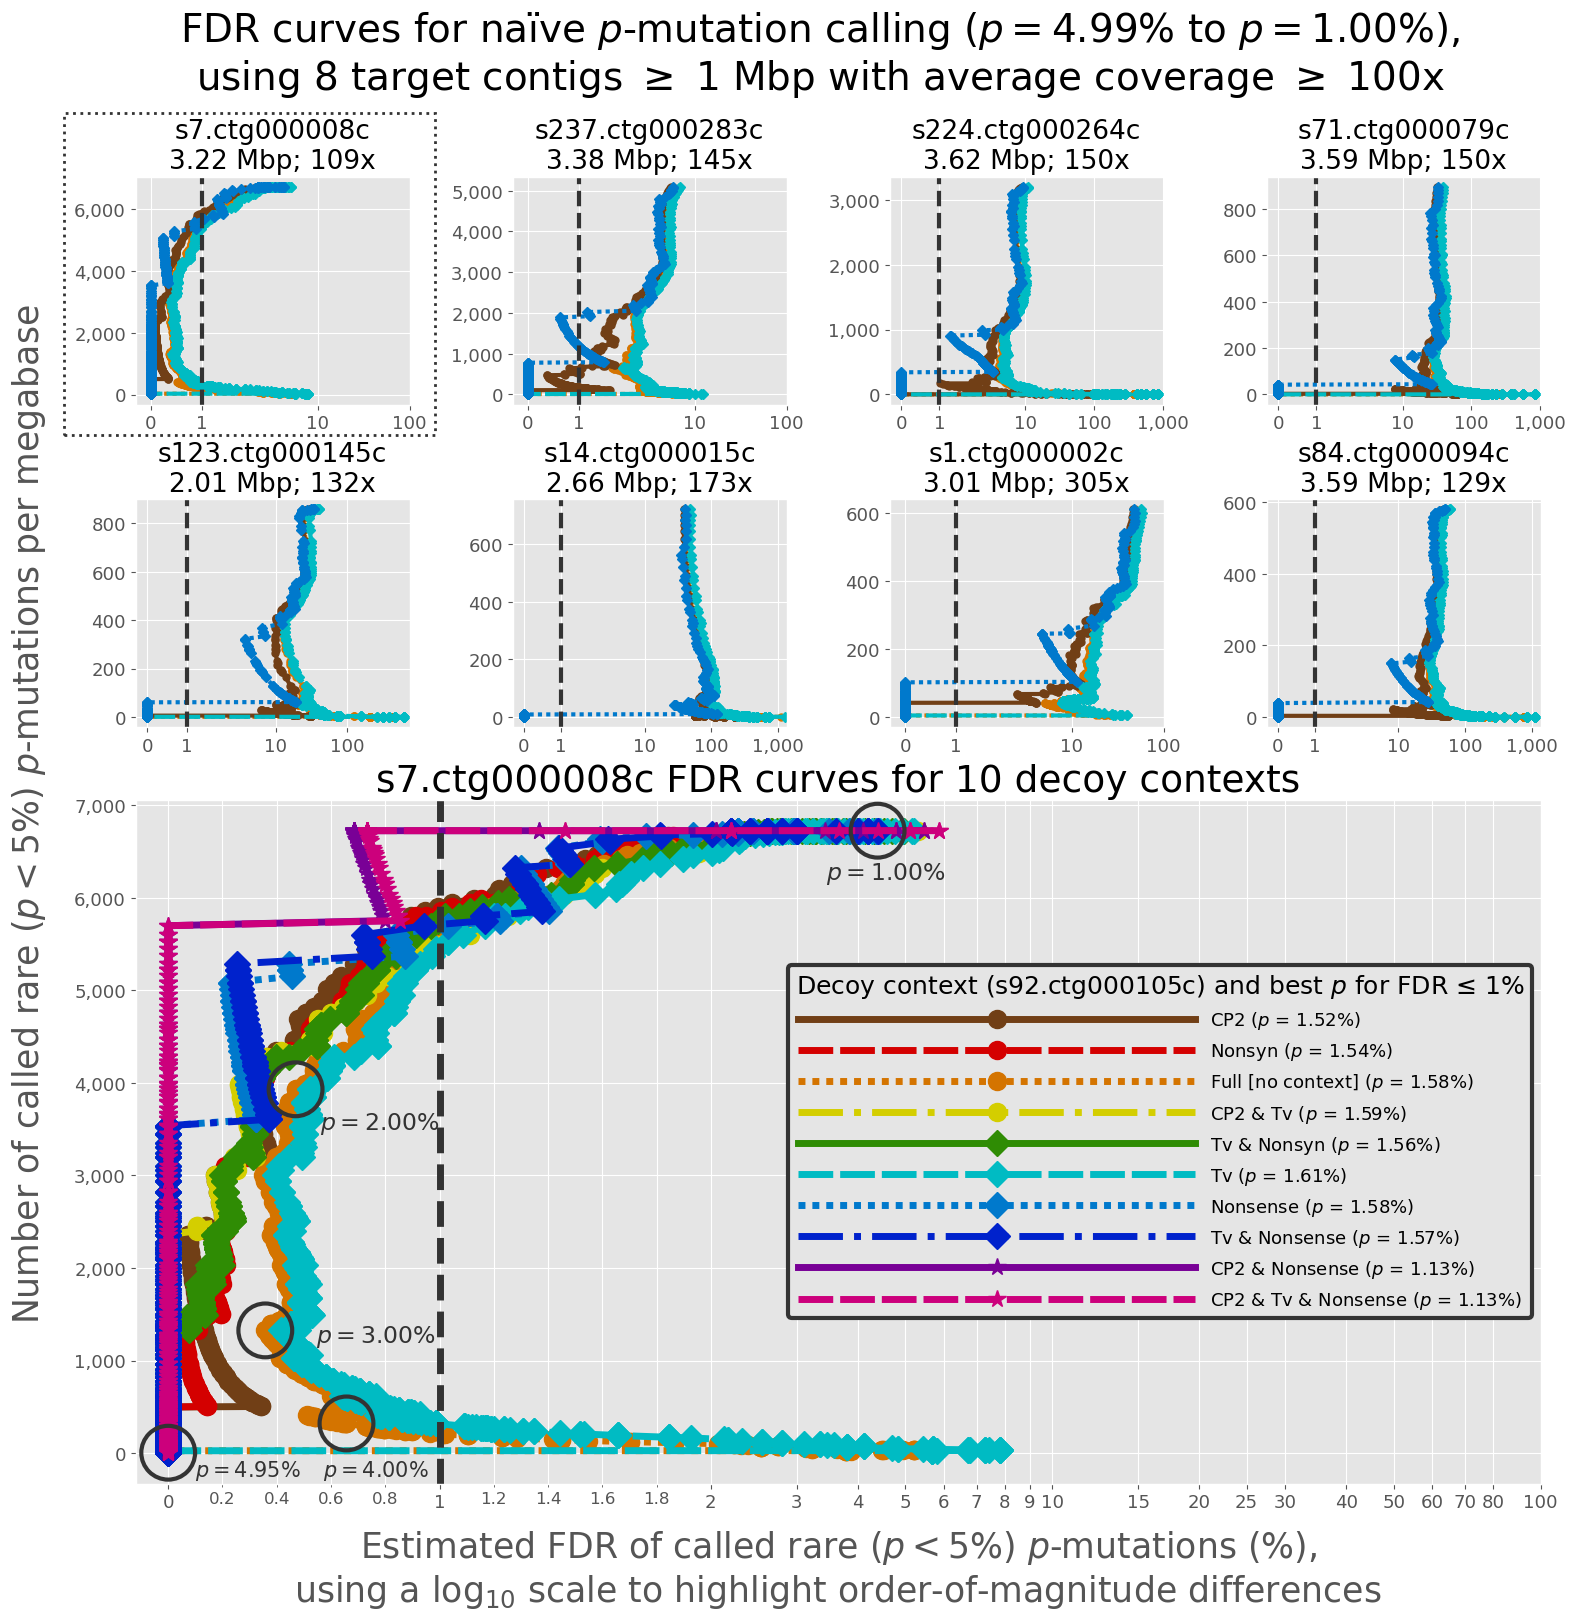

In [25]:
fig, axes = pyplot.subplot_mosaic(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
    ],
    constrained_layout=True
)

for ci, contig in enumerate(small_plot_contigs):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # This matches the suplot mosaic labels we set above.
    
    assert contig != DECOY_CONTIG
    
    # set up title
    length_info = f"{round(di['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(di['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[ci].set_title(title, fontsize=19)
    
    plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot_small, axes[ci])
    
plot_fdr_curves(ctx2fdr, numpermbs, BIG_CONTIG, ctxs, axes[8], lw=5, markersize=13, xlim_min=-0.12)
# axes[8].set_xlim(-0.12, 500)

# fancy x-axis stuff for the bottom plot
# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x > 20 else "{:,}".format(x)
)
axes[8].xaxis.set_major_formatter(ff)
axes[8].xaxis.set_minor_formatter(ff)
axes[8].set_xticks([x / 10 for x in range(2, 20, 2)], minor=True)
axes[8].set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])

# fancy legend for the bottom plot
axes[8].legend(
    handlelength=22,
    fontsize=13,
    title=f"Decoy context ({DECOY_CONTIG}) and best $p$ for FDR \u2264 1%",
    title_fontsize=18,
    framealpha=1,
    edgecolor="#333",
).get_frame().set_linewidth(3)

# title for the bottom plot
axes[8].set_title(
    f'{BIG_CONTIG} FDR curves for {len(ctxs):,} decoy contexts',
    fontsize=27
)

# the minor ticks don't make vertical gridlines show up by default -- this fixes that
axes[8].grid(which="both", color="white")

yvals = numpermbs.loc[BIG_CONTIG]
sp2xy = {
    100: [3.44, 6200],
    200: [0.56, 3500],
    300: [0.545, 1200],
    400: [0.57, -250],
    495: [0.1, -250]
}
for special_p in sp2xy.keys():
    p = f"p{special_p}"
    x = ctx2fdr["Full"][p][BIG_CONTIG]
    axes[8].scatter(x, yvals[p], 1500, color="#333", facecolor="none", lw=3, zorder=999)
    print(x, yvals[p])
    tsp = f"$p = {special_p / 100:.2f}\%$"
    # hack specific to this plot
    if special_p >= 400:
        fs = 15
    else:
        fs = 17
    axes[8].text(*sp2xy[special_p], tsp, fontsize=fs, **special_p_kwargs)

    # just for sanity checking - you can use this to verify that the sp2xy coordinates
    # point to the correct values of p
#     axes[8].text(x, yvals[p], special_p)


# Add a rectangle surrounding the subplot for the small BIG_CONTIG FDR curve
brect = patches.Rectangle(
    (-0.004, 0.786), 0.247, 0.215, edgecolor="#333", facecolor="None", lw=2, linestyle=":",
    transform=fig.transFigure
)
fig.patches.extend([brect])

rare_text = "called rare ($p < 5\%$) $p$-mutations"
fig.text(
    -0.04, 0.2, f"Number of {rare_text} per megabase",
    fontsize=25, rotation="vertical", color="#555"
)
axes[8].set_xlabel(
    (
        f"Estimated FDR of {rare_text} (%),\n"
        "using a log$_{{10}}$ scale to highlight order-of-magnitude differences"
    ),
    fontsize=25, color="#555", labelpad=12
)
fig.suptitle(
    (
        f"FDR curves for na\u00efve $p$-mutation calling ($p = 4.99\%$ to $p = 1.00\%$),\n"
        f"using {len(small_plot_contigs):,} target contigs $\geq$ 1 Mbp with average coverage $\geq$ 100x"
    ),
    fontsize=28,
    y=1.07
)

fig.set_size_inches(15, 15)
fig.savefig("../../notebooks/figs/chickengut_fdr_curves.pdf", bbox_inches="tight")

In [112]:
ctx2fdr["Full"].loc[BIG_CONTIG].isna()

p100    False
p101    False
p102    False
p103    False
p104    False
        ...  
p495    False
p496     True
p497     True
p498     True
p499     True
Name: s7.ctg000008c, Length: 400, dtype: bool

In [23]:
(numpermbs["p152"][BIG_CONTIG] * 3224463)/1e6

19022.0

In [125]:
di["Length"][BIG_CONTIG]

3224463

In [128]:
numpermbs["p152"][BIG_CONTIG]

5899.276871838814